<a href="https://colab.research.google.com/github/albertoprocacci/OpenMEASURE/blob/master/PCA_digits_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises on PCA

## Exercise 1: Hand-written digits

The goal of the exercise is to perform PCA on a dataset containing hand-written digits. 
The dataset contains 1797 8x8 images of digits in the range 0-9.
How can PCA help in the recognition of different digits?

In the first cell we import the libraries that we are going to use and the digits dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits_images = load_digits().data  # images dataset size 1767x64
digits_labels = load_digits().target # images labels size 1767

print(digits_images.shape) #check the dimensions


(1797, 64)


We can also plot the digits, but first we need to reshape it in a 8x8 image.

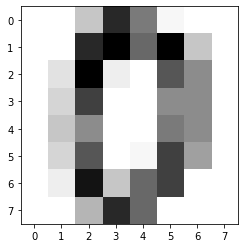

Image index: 0


In [ ]:
# select the index of the digit to show
index = 0

# select the image and reshape it to show it
digit = digits_images[index,:].reshape(8,8)
plt.imshow(digit, cmap='Greys')
plt.xticks(np.linspace(0, 7, 8))
plt.yticks(np.linspace(0, 7, 8))
plt.show()

# print the label corresponding to the image
print(f'Image index: {digits_labels[index]}')


Now, we write a function to implement the PCA algorithm. Conventionally, the mean is removed from the dataset before applying PCA. If this is not done, the mean will be the first PC.

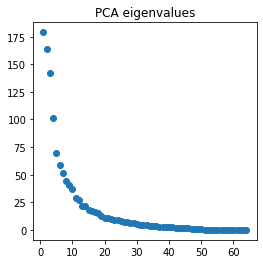

In [ ]:
# To do: implement the PCA algorithm

# Hint: The PCA algorithm consists of:
# - center the matrix X
# - compute the covariance matrix S = 1/(n-1) * (X0.T @ X0)
# - compute the eigendecomposition using np.linalg.eig
# - sort the eigenvalues using np.sort and np.argsort
# - compute the PC scores Z = X @ A

def PCA(digits_images):
  mean = np.mean(digits_images, axis=0)
  X0 = digits_images-mean
  n = X0.shape[0]
  S = 1/(n-1) * (X0.T @ X0)
  l, A = np.linalg.eig(S)
  index_sort = np.argsort(-l)
  l_sort = l[index_sort]
  A_sort = A[:, index_sort]
  Z = X0 @ A_sort
  return A_sort, Z, l_sort

A, Z, l = PCA(digits_images)

# Uncomment when you have defined the function PCA
# A, Z, l = PCA(digits_images)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(np.linspace(1, 64, 64), l)
ax.set_title('PCA eigenvalues')
plt.show()

Now, we can perform the PCA and plot the explained variance of the resulting PCs

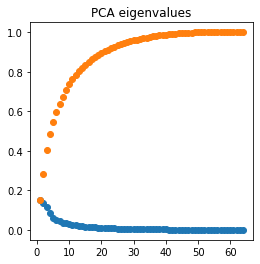

In [ ]:
# We import the PCA object from the sklearn package
from sklearn.decomposition import PCA

# To do: show the explained variance ratio as a function of the principal components

# hint: the documentation and examples to use the PCA object are at:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


pca = PCA()
pca.fit(digits_images)

# l_sklearn = pca.explained_variance_
l_sklearn = pca.explained_variance_ratio_

sum_l_sklearn = np.cumsum(l_sklearn)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(np.linspace(1, 64, 64), l_sklearn)
ax.scatter(np.linspace(1, 64, 64), sum_l_sklearn)
ax.set_title('PCA eigenvalues')
plt.show()


We can also retrieve the PCs (A), and calculate the PC scores (Z).

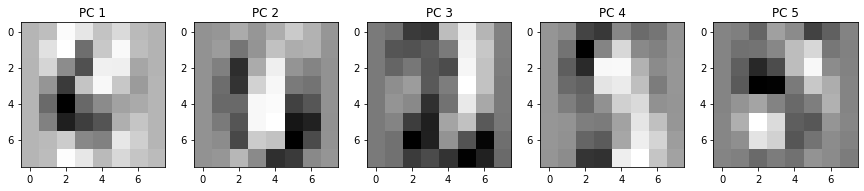

In [ ]:
# To do: calculate the PC matrix A and the PC scores matrix Z. Then plot the first five PCs.

# hint: A is equal to the transpose of the attribute "components_" of the PCA object and Z = X A

# To plot the first five PCs, uncomment the lines below after you have calculated A 
A = pca.components_.T
Z = digits_images @ A

n_pcs = 5
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(A[:,i].reshape(8,8), cmap='Greys')
    ax.set_title('PC ' + str(i+1))


We can also check if we can use PCA to achieve dimensionality reduction. This means that we can reconstructed the digits using few PCs.

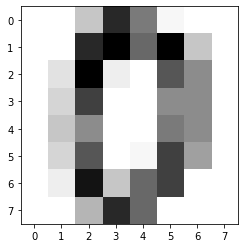

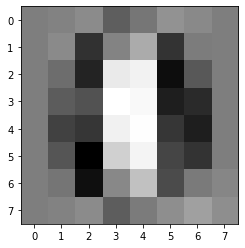

In [ ]:
# To do: reconstruct the digit index 0 using the first 20 PCs, and compare it to the original

# hint: X_reconstructed = Zq Aq.T 

q = 5
Zq = Z[:, :q]
Aq = A[:,:q]

X_reconstructed = Zq @ Aq.T

index = 0

digit = digits_images[index,:].reshape(8,8)
digit_reconstructed = X_reconstructed[index, :].reshape(8,8)

plt.imshow(digit, cmap='Greys')
plt.xticks(np.linspace(0, 7, 8))
plt.yticks(np.linspace(0, 7, 8))
plt.show()

plt.imshow(digit_reconstructed, cmap='Greys')
plt.xticks(np.linspace(0, 7, 8))
plt.yticks(np.linspace(0, 7, 8))
plt.show()


Optional: explain what is the difference between using the canonical basis and the PCs to express the images, and why we can reduce the dimensionality with PCA and not with the canonical basis. 

In [ ]:
# To do: show the difference between using the canonical basis and PCs to represent the image of the first digit

# Hint: in the canonical basis X[0,:] = W[0,:] @ B.T
#       while with PCA it is X[0,:] = Z[0,:] @ A.T   

Optional: Show how the PC scores can be used to cluster the data by plotting the first two vectors of the PC scores (Z).

In [ ]:
# Uncomment the lines below after you have calculated Z 

#fig, ax = plt.subplots(figsize=(8,5))
#im = ax.scatter(Z[:,0], Z[:,1], c=digits_labels, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
#fig.colorbar(im)
#plt.show()